In [99]:
import requests
import shutil
import os
import io
import json
import time
import datetime
import dateutil
import re
from IPython.display import clear_output
from pprint import pprint


In [100]:
parent_folder='steam_data'

if not os.path.exists(parent_folder):
    os.makedirs(parent_folder)

In [114]:
with open(os.path.join(parent_folder,'steamspy_exearlyaccess.html'),'r') as file:
    temphtml=file.read()
all_games=re.findall(r'<td data-order=.+<a href=/app/[0-9]+',temphtml)
with open(os.path.join(parent_folder,'steamspy_earlyaccess.html'),'r') as file:
    temphtml=file.read()
all_games+=re.findall(r'<td data-order=.+<a href=/app/[0-9]+',temphtml)
with open(os.path.join(parent_folder,'steamspy_earlyaccess_tag.html'),'r') as file:
    temphtml=file.read()
all_games+=re.findall(r'<td data-order=.+<a href=/app/[0-9]+',temphtml)
game_names={}
for game_str in all_games:
    quotes=[game_str.find('"'),game_str.rfind('"')]
    tempappid=int(game_str[game_str.index("/app/")+5:])
    if tempappid not in game_names:
        game_names[int(game_str[game_str.index("/app/")+5:])]=game_str[quotes[0]+1:quotes[1]]
game_names.pop(296750)
game_names.pop(622050)
game_names.pop(719950)
game_names.pop(575050) # blocked in US
game_names.pop(353370) # steam controller!!
all_appids=sorted(list(game_names.keys()))
print(len(all_appids))
#all_appids.remove(578080) #remove pubg...
print(len(all_appids))
#all_appids=[578080] #pubg only!
#all_appids=[433850] #error fixing...
print(len(all_appids))

4621
4621
4621


In [115]:
with open(os.path.join(parent_folder,'early_access_search','found_games'),'r') as file:
    other_ids_1=set([int(x) for x in file.read().split('\n')[:-1]])
with open(os.path.join(parent_folder,'early_access_search','found_games_2'),'r') as file:
    other_ids_2=set([int(x) for x in file.read().split('\n')[:-1]])
other_ids=sorted(list(other_ids_1 | other_ids_2))

all_appids+=other_ids
print(len(all_appids))

5194


In [108]:
review_language="all"

review_subfolder='r_complete'
#if review_language != 'english':
#    review_subfolder=review_subfolder+'_'+review_language

with open(os.path.join(parent_folder,'errors'),'a') as error_file:
    error_file.write("---\n")
    for i in range(0,len(all_appids)):
        appid=str(all_appids[i])
        if not os.path.exists(os.path.join(parent_folder,appid)):
            os.makedirs(os.path.join(parent_folder,appid))
        if not os.path.exists(os.path.join(os.path.join(parent_folder,appid),review_subfolder)):
            os.makedirs(os.path.join(os.path.join(parent_folder,appid),review_subfolder))
        print(appid)
        for start_offset in range(0,2000000,100):#12100,100):
            #time.sleep(0.1)
            not_successful=True
            while not_successful:
                try:
                    tempjson=requests.get("https://store.steampowered.com/appreviews/"+appid+"?json=1&filter=recent&start_offset="+str(start_offset)+"&num_per_page=100&language="+review_language+"&purchase_type=all&review_type=all").text
                    not_successful=False
                except:
                    time.sleep(29)
            if len(tempjson)>12 and tempjson[0:12]=='{"success":1':
                #while len(tempjson)<12 or tempjson[0:12]!='{"success":1':
                #    print("ERROR ("+appid+","+str(start_offset)+"): "+tempjson)
                #    time.sleep(60)
                #    tempjson=requests.get("https://store.steampowered.com/appreviews/"+appid+"?json=1&filter=recent&start_offset="+str(start_offset)+"&num_per_page=100").text
                if tempjson=='{"success":1,"query_summary":{"num_reviews":0},"reviews":[]}':
                    break
                else:
                    with open(os.path.join(os.path.join(os.path.join(parent_folder,appid),review_subfolder),str(start_offset)), 'w') as file:
                        file.write(tempjson)
            else:
                error_file.write(str(appid)+"-"+str(start_offset)+"-"+review_language+'\n')
            #tempjsons.append(requests.get("https://store.steampowered.com/appreviews/"+appid+"?json=1&filter=recent&start_offset="+str(start_offset)+"&num_per_page=100").text)
            #print(tempjsons[-1]=='{"success":1,"query_summary":{"num_reviews":0},"reviews":[]}')
            print(str(i+1)+"/"+str(len(all_appids))+" (" +str(appid)+"): "+str(int(start_offset/100)))
            #print(str(i+1)+"/"+str(len(all_appids))+" (" +str(game_names[int(appid)])+"): "+str(int(start_offset/100)))
    print("Done!")


116100
1/573 (116100): 0
1/573 (116100): 1
1/573 (116100): 2
1/573 (116100): 3
200150
2/573 (200150): 0
2/573 (200150): 1
2/573 (200150): 2
214190
3/573 (214190): 0
3/573 (214190): 1
3/573 (214190): 2
3/573 (214190): 3
3/573 (214190): 4
3/573 (214190): 5
3/573 (214190): 6
3/573 (214190): 7
3/573 (214190): 8
3/573 (214190): 9
3/573 (214190): 10
3/573 (214190): 11
3/573 (214190): 12
3/573 (214190): 13
3/573 (214190): 14
3/573 (214190): 15
3/573 (214190): 16
3/573 (214190): 17
3/573 (214190): 18
3/573 (214190): 19
3/573 (214190): 20
3/573 (214190): 21
3/573 (214190): 22
3/573 (214190): 23
3/573 (214190): 24
3/573 (214190): 25
3/573 (214190): 26
3/573 (214190): 27
3/573 (214190): 28
3/573 (214190): 29
3/573 (214190): 30
3/573 (214190): 31
3/573 (214190): 32
3/573 (214190): 33
3/573 (214190): 34
3/573 (214190): 35
3/573 (214190): 36
3/573 (214190): 37
3/573 (214190): 38
3/573 (214190): 39
3/573 (214190): 40
3/573 (214190): 41
3/573 (214190): 42
3/573 (214190): 43
216174
4/573 (216174): 0
21

16/573 (247730): 53
16/573 (247730): 54
16/573 (247730): 55
16/573 (247730): 56
16/573 (247730): 57
16/573 (247730): 58
16/573 (247730): 59
16/573 (247730): 60
16/573 (247730): 61
16/573 (247730): 62
16/573 (247730): 63
16/573 (247730): 64
16/573 (247730): 65
16/573 (247730): 66
16/573 (247730): 67
16/573 (247730): 68
16/573 (247730): 69
16/573 (247730): 70
16/573 (247730): 71
16/573 (247730): 72
16/573 (247730): 73
16/573 (247730): 74
16/573 (247730): 75
16/573 (247730): 76
16/573 (247730): 77
16/573 (247730): 78
16/573 (247730): 79
16/573 (247730): 80
16/573 (247730): 81
16/573 (247730): 82
16/573 (247730): 83
16/573 (247730): 84
16/573 (247730): 85
16/573 (247730): 86
16/573 (247730): 87
16/573 (247730): 88
16/573 (247730): 89
16/573 (247730): 90
16/573 (247730): 91
16/573 (247730): 92
16/573 (247730): 93
16/573 (247730): 94
16/573 (247730): 95
16/573 (247730): 96
16/573 (247730): 97
16/573 (247730): 98
16/573 (247730): 99
16/573 (247730): 100
16/573 (247730): 101
16/573 (247730): 1

28/573 (257170): 6
28/573 (257170): 7
28/573 (257170): 8
28/573 (257170): 9
28/573 (257170): 10
259470
29/573 (259470): 0
259660
30/573 (259660): 0
30/573 (259660): 1
30/573 (259660): 2
30/573 (259660): 3
260330
31/573 (260330): 0
31/573 (260330): 1
261530
32/573 (261530): 0
32/573 (261530): 1
32/573 (261530): 2
32/573 (261530): 3
32/573 (261530): 4
32/573 (261530): 5
32/573 (261530): 6
32/573 (261530): 7
32/573 (261530): 8
32/573 (261530): 9
32/573 (261530): 10
32/573 (261530): 11
32/573 (261530): 12
32/573 (261530): 13
32/573 (261530): 14
32/573 (261530): 15
32/573 (261530): 16
32/573 (261530): 17
32/573 (261530): 18
32/573 (261530): 19
32/573 (261530): 20
32/573 (261530): 21
32/573 (261530): 22
32/573 (261530): 23
32/573 (261530): 24
32/573 (261530): 25
32/573 (261530): 26
32/573 (261530): 27
262210
33/573 (262210): 0
33/573 (262210): 1
262630
34/573 (262630): 0
263020
35/573 (263020): 0
35/573 (263020): 1
35/573 (263020): 2
35/573 (263020): 3
35/573 (263020): 4
35/573 (263020): 5
3

56/573 (286040): 23
56/573 (286040): 24
56/573 (286040): 25
56/573 (286040): 26
56/573 (286040): 27
56/573 (286040): 28
56/573 (286040): 29
288120
57/573 (288120): 0
57/573 (288120): 1
57/573 (288120): 2
57/573 (288120): 3
57/573 (288120): 4
57/573 (288120): 5
288330
58/573 (288330): 0
289130
59/573 (289130): 0
59/573 (289130): 1
59/573 (289130): 2
59/573 (289130): 3
59/573 (289130): 4
59/573 (289130): 5
59/573 (289130): 6
59/573 (289130): 7
59/573 (289130): 8
59/573 (289130): 9
59/573 (289130): 10
59/573 (289130): 11
59/573 (289130): 12
59/573 (289130): 13
59/573 (289130): 14
59/573 (289130): 15
59/573 (289130): 16
59/573 (289130): 17
59/573 (289130): 18
59/573 (289130): 19
59/573 (289130): 20
59/573 (289130): 21
59/573 (289130): 22
59/573 (289130): 23
59/573 (289130): 24
59/573 (289130): 25
59/573 (289130): 26
59/573 (289130): 27
59/573 (289130): 28
59/573 (289130): 29
59/573 (289130): 30
59/573 (289130): 31
59/573 (289130): 32
59/573 (289130): 33
59/573 (289130): 34
59/573 (289130):

76/573 (308420): 12
76/573 (308420): 13
76/573 (308420): 14
76/573 (308420): 15
76/573 (308420): 16
76/573 (308420): 17
76/573 (308420): 18
76/573 (308420): 19
76/573 (308420): 20
76/573 (308420): 21
76/573 (308420): 22
76/573 (308420): 23
76/573 (308420): 24
76/573 (308420): 25
76/573 (308420): 26
76/573 (308420): 27
76/573 (308420): 28
76/573 (308420): 29
76/573 (308420): 30
308540
77/573 (308540): 0
310510
78/573 (310510): 0
78/573 (310510): 1
78/573 (310510): 2
78/573 (310510): 3
78/573 (310510): 4
78/573 (310510): 5
78/573 (310510): 6
78/573 (310510): 7
78/573 (310510): 8
78/573 (310510): 9
78/573 (310510): 10
78/573 (310510): 11
311930
79/573 (311930): 0
312310
80/573 (312310): 0
313130
81/573 (313130): 0
81/573 (313130): 1
314050
82/573 (314050): 0
314980
83/573 (314980): 0
83/573 (314980): 1
83/573 (314980): 2
83/573 (314980): 3
83/573 (314980): 4
83/573 (314980): 5
317080
84/573 (317080): 0
317440
85/573 (317440): 0
85/573 (317440): 1
317950
86/573 (317950): 0
322580
87/573 (3

535350
221/573 (535350): 0
536670
222/573 (536670): 0
539400
223/573 (539400): 0
223/573 (539400): 1
542030
224/573 (542030): 0
542620
225/573 (542620): 0
543380
226/573 (543380): 0
544400
227/573 (544400): 0
545600
228/573 (545600): 0
228/573 (545600): 1
545890
229/573 (545890): 0
547970
230/573 (547970): 0
548470
231/573 (548470): 0
550360
232/573 (550360): 0
550870
233/573 (550870): 0
551700
234/573 (551700): 0
234/573 (551700): 1
234/573 (551700): 2
554000
235/573 (554000): 0
235/573 (554000): 1
235/573 (554000): 2
555050
236/573 (555050): 0
236/573 (555050): 1
555600
237/573 (555600): 0
556920
238/573 (556920): 0
560340
239/573 (560340): 0
563380
240/573 (563380): 0
564080
241/573 (564080): 0
566420
242/573 (566420): 0
566980
243/573 (566980): 0
567220
244/573 (567220): 0
568720
245/573 (568720): 0
245/573 (568720): 1
569720
246/573 (569720): 0
246/573 (569720): 1
570230
247/573 (570230): 0
570470
248/573 (570470): 0
570600
249/573 (570600): 0
571430
250/573 (571430): 0
571660
251

481/573 (841770): 1
481/573 (841770): 2
481/573 (841770): 3
481/573 (841770): 4
842780
482/573 (842780): 0
844330
483/573 (844330): 0
844490
484/573 (844490): 0
845200
485/573 (845200): 0
847660
486/573 (847660): 0
848890
487/573 (848890): 0
849870
488/573 (849870): 0
853200
489/573 (853200): 0
854950
490/573 (854950): 0
856550
491/573 (856550): 0
858360
492/573 (858360): 0
860870
493/573 (860870): 0
862590
494/573 (862590): 0
863290
495/573 (863290): 0
863380
496/573 (863380): 0
863420
497/573 (863420): 0
864110
498/573 (864110): 0
865220
499/573 (865220): 0
866180
500/573 (866180): 0
867550
501/573 (867550): 0
870100
502/573 (870100): 0
870160
503/573 (870160): 0
871140
504/573 (871140): 0
871230
505/573 (871230): 0
871990
506/573 (871990): 0
506/573 (871990): 1
506/573 (871990): 2
506/573 (871990): 3
506/573 (871990): 4
873860
507/573 (873860): 0
877230
508/573 (877230): 0
878350
509/573 (878350): 0
879740
510/573 (879740): 0
881230
511/573 (881230): 0
882080
512/573 (882080): 0
883

In [127]:
appid="361420"#"366910"#"361420"
reviews=[]
for start_offset in range(0,11900,100):
    with open(os.path.join(os.path.join(os.path.join(parent_folder,appid),'r'),str(start_offset)),'r') as file:
        reviews+= json.load(file)['reviews']
        

In [131]:
#print(reviews[0]['voted_up'])
#print(reviews[0]['timestamp_created'])
#print(reviews[0]['timestamp_updated'])
#print(reviews[0])
recids=set()
positive_dict={}
num_reviews_dict={}
created=[]
for review in reviews:
    if review['timestamp_created']==review['timestamp_updated']:
        created.append(review['timestamp_created'])
#updates=[]
min_year=int(datetime.datetime.utcfromtimestamp(min(created)).strftime('%Y'))
min_month=int(datetime.datetime.utcfromtimestamp(min(created)).strftime('%m'))
for review in reviews:
    if review['recommendationid'] not in recids and review['timestamp_created']==review['timestamp_updated']:
        unixdate=review['timestamp_created']
        year=int(datetime.datetime.utcfromtimestamp(unixdate).strftime('%Y'))
        month=int(datetime.datetime.utcfromtimestamp(unixdate).strftime('%m'))
        mo=(year-min_year)*12+(month-min_month)
        if mo not in num_reviews_dict:
            positive_dict[mo]=0
            num_reviews_dict[mo]=0
        num_reviews_dict[mo]+=1
        if review['voted_up']:
            positive_dict[mo]+=1

ordered_mos=sorted(positive_dict.keys())
num_reviews=[num_reviews_dict[ordered_mos[x]] for x in ordered_mos]
pos_reviews=[positive_dict[ordered_mos[x]] for x in ordered_mos]
ratios=[float(positive_dict[ordered_mos[x]])/float(num_reviews_dict[ordered_mos[x]])  for x in ordered_mos]
cumulative_ratios=[float(sum(pos_reviews[:x+1]))/float(sum(num_reviews[:x+1]))  for x in range(len(ordered_mos))]

#print(ratios)
    #print((year-2016)*12+(month-12))
#print(min(created))
#year=int(datetime.datetime.utcfromtimestamp(1481868474).strftime('%Y'))
#month=int(datetime.datetime.utcfromtimestamp(1481868474).strftime('%m'))
#print((year-2016)*12+(month-12))
#print(datetime.datetime.utcfromtimestamp(1481868474).strftime('%Y'))
#print(datetime.datetime.utcfromtimestamp(1481868474).strftime('%m'))
#print(datetime.datetime.utcfromtimestamp(1481868474).strftime('%Y-%m-%d %H:%M:%S'))
#for review in reviews:
    

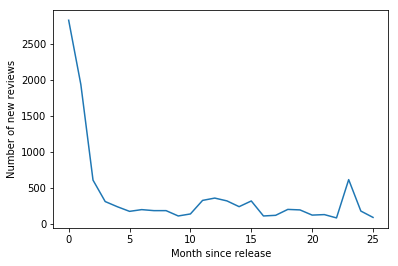

In [132]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.xlabel("Month since release")
plt.ylabel("Number of new reviews")
plt.plot(ordered_mos,num_reviews);

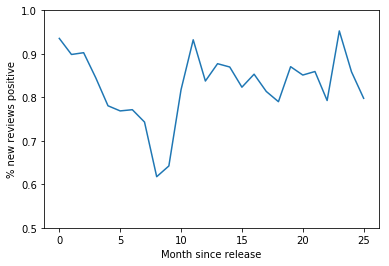

In [135]:
plt.xlabel("Month since release")
plt.ylabel("% new reviews positive")
plt.ylim(0.5,1)
plt.plot(ordered_mos,ratios);

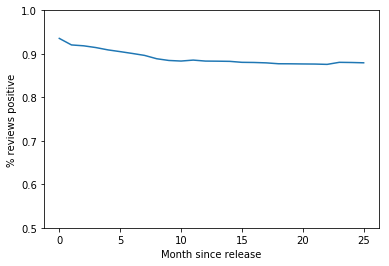

In [134]:
plt.xlabel("Month since release")
plt.ylabel("% reviews positive")
plt.ylim(0.5,1)
plt.plot(ordered_mos,cumulative_ratios);

In [138]:
pprint(review)

{'author': {'last_played': 1519473035,
            'num_games_owned': 477,
            'num_reviews': 21,
            'playtime_forever': 937,
            'playtime_last_two_weeks': 0,
            'steamid': '76561198141049846'},
 'comment_count': 0,
 'language': 'english',
 'received_for_free': False,
 'recommendationid': '28399790',
 'review': 'Nice relaxing game, good graphics, good soundtrack, fun '
           'exploration but lacks alot of content\n'
           '\n'
           'I bought this game on its release day and I can say after a full '
           'year of waiting for more content, nothing was really added to be '
           "honest, thankfully the bugs are fixed as it's launch sure was not "
           'the greatest, about just as bad as dice games launch.',
 'steam_purchase': True,
 'timestamp_created': 1481868474,
 'timestamp_updated': 1514974391,
 'voted_up': False,
 'votes_funny': 0,
 'votes_up': 0,
 'weighted_vote_score': 0,
 'written_during_early_access': True}


In [197]:
print("Hello")

Hello


In [227]:
review_language="english"

review_subfolder='r'
if review_language != 'english':
    review_subfolder=review_subfolder+'_'+review_language

for i in range(len(all_appids)):
    too_few_reviews=0
    too_few_reviews_offsets=[]
    appid=str(all_appids[i])
    for filename in os.listdir(os.path.join(os.path.join(os.path.join(parent_folder,appid),review_subfolder))):
        if filename.isdigit() or (len(filename)>1 and filename[-1]=='b' and filename[:-1].isdigit()):
            with open(os.path.join(os.path.join(os.path.join(parent_folder,appid),review_subfolder),filename),'r') as file:
                #if appid=='310380':
                #    pprint(json.load(file)['query_summary'])
                if int(json.load(file)['query_summary']['num_reviews']) !=100:
                    too_few_reviews+=1
                    too_few_reviews_offsets.append(filename)
                
    if too_few_reviews>1:
        print("FAIL: "+appid)
        print(too_few_reviews_offsets)

# Turns out sometimes the Steam API doesn't return every review in a
# certain range, even if there are more reviews after that one! I've tried re-downloading and
# it does not appear to be down to a network blip. Possibly Steam itself blocks some reviews
# from being shown, or they contain characters that cause problems for the request?
# It appears to be really uncommon in any case

FAIL: 25000
['2200', '1400']
FAIL: 107410
['25400', '6000', '15800', '41400', '36300']
FAIL: 108600
['7400', '3600', '3800', '2500']
FAIL: 211820
['17100', '14800', '34100', '4500', '17400', '33500']
FAIL: 219990
['3700', '10400']
FAIL: 220200
['31100', '21000', '29900']
FAIL: 221100
['14100', '12800', '11400', '15100', '79200', '67600', '29200', '38300', '92100', '82200', '8800']
FAIL: 227160
['1000', '200']
FAIL: 228380
['5600', '3100', '3800']
FAIL: 232090
['2600', '4500', '6300', '23400']
FAIL: 233450
['3900', '16800']
FAIL: 242760
['8000', '15500', '14600', '42700', '14500']
FAIL: 242840
['0', '300']
FAIL: 244210
['6500', '2400']
FAIL: 246620
['8900', '8800']
FAIL: 251570
['10200', '28400']
FAIL: 252490
['81100', '91900', '88700', '46200', '22200', '4200', '64400']
FAIL: 264710
['10700', '50500', '29600', '47300']
FAIL: 274190
['12600', '300', '2400']
FAIL: 282560
['1500', '600']
FAIL: 284160
['7200', '5700']
FAIL: 290080
['1500', '3600']
FAIL: 291860
['2200', '3000']
FAIL: 295110

In [258]:
review_language="english"

review_subfolder='r'
if review_language != 'english':
    review_subfolder=review_subfolder+'_'+review_language

for i in range(len(all_appids)):
    output_json={}
    output_reviews=[]
    recids=set()
    appid=str(all_appids[i])
    for filename in os.listdir(os.path.join(os.path.join(os.path.join(parent_folder,appid),review_subfolder))):
        if filename.isdigit() or (len(filename)>1 and filename[-1]=='b' and filename[:-1].isdigit()):
            with open(os.path.join(os.path.join(os.path.join(parent_folder,appid),review_subfolder),filename),'r') as file:
                reviews=json.load(file)['reviews']
                for review in reviews:
                    recid=review['recommendationid']
                    if recid not in recids:
                        recids.add(recid)
                        output_reviews.append(review)
    output_json['num_reviews']=len(output_reviews)
    output_json['reviews']=output_reviews
    if(len(output_reviews)!=0):
        if not os.path.exists(os.path.join(parent_folder,appid+"_bulk")):
            os.makedirs(os.path.join(parent_folder,appid+"_bulk"))
        if not os.path.exists(os.path.join(os.path.join(parent_folder,appid+"_bulk"),"json")):
            os.makedirs(os.path.join(os.path.join(parent_folder,appid+"_bulk"),"json"))
        with open(os.path.join(os.path.join(os.path.join(parent_folder,appid+"_bulk"),"json"),appid+"_reviews_"+review_language),'w') as file:  
            json.dump(output_json, file)
    print(str(i+1)+"/"+str(len(all_appids))+" (" +str(game_names[int(appid)])+"): "+str(output_json['num_reviews']))
print("Done!")

1/4626 (1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby)): 368
2/4626 (GROUND BRANCH): 324
3/4626 (Overgrowth): 2203
4/4626 (Arma 3): 41251
5/4626 (Project Zomboid): 7446
6/4626 (AirMech Strike): 50
7/4626 (SpeedRunners): 5955
8/4626 (Starbound): 34062
9/4626 (Gear Up): 631
10/4626 (Zombie Playground): 56
11/4626 (Closers): 159
12/4626 (Waves 2): 36
13/4626 (Grim Dawn): 10405
14/4626 (Kerbal Space Program): 31099
15/4626 (DayZ): 92062
16/4626 (Blockscape): 440
17/4626 (Xenonauts): 1383
18/4626 (Folk Tale): 1797
19/4626 (Gnomoria): 1886
20/4626 (Clockwork Empires): 490
21/4626 (Blade Symphony): 1873
22/4626 (PixelJunk Nom Nom Galaxy): 327
23/4626 (Galactic Civilizations III): 4973
24/4626 (Hegemony Rome: The Rise of Caesar): 211
25/4626 (Kinetic Void): 1098
26/4626 (Serious Sam Classics: Revolution): 454
27/4626 (Castle Story): 2705
28/4626 (Heroes & Generals): 1137
29/4626 (Wreckfest): 5635
30/4626 (Hacker Evolution IMMERSION): 7
31/4626 (Dream): 554
32/4626 (The Age of Decad

264/4626 (Master of Orion): 2299
265/4626 (Terraformer Expedition to Mars): 28
266/4626 (Red Crucible: Firestorm): 88
267/4626 (XenoRaptor): 55
268/4626 (Captain Forever Remix): 147
269/4626 (Ylands): 1420
270/4626 (European Ship Simulator): 255
271/4626 (Habitat): 121
272/4626 (CubeGun): 16
273/4626 (Rogue Stormers): 115
274/4626 (Abducted): 20
275/4626 (Miscreated): 9943
276/4626 (Planetoid Pioneers): 146
277/4626 (Adventurezator: When Pigs Fly): 12
278/4626 (Road Redemption): 2794
279/4626 (Infinifactory): 867
280/4626 (Epsilon): 34
281/4626 (Night Shift): 24
282/4626 (Eastside Hockey Manager): 567
283/4626 (BOMB: Who let the dogfight?): 50
284/4626 (Robocraft): 1135
285/4626 (City of Brass): 150
286/4626 (XenoRaptor Demo): 0
287/4626 (Dungeon Defenders Eternity): 1069
288/4626 (Of Guards And Thieves): 260
289/4626 (Call to Arms): 1949
290/4626 (Divinia Chronicles: Relics of Gan-Ti): 8
291/4626 (BLOCKADE 3D): 114
292/4626 (Sentris): 18
293/4626 (Adventures of Pip): 71
294/4626 (Arch

538/4626 (Airships: Conquer the Skies): 1534
539/4626 (Brawlerz Nitro): 3
540/4626 (Corona MotorSport): 9
541/4626 (Vantage: Primitive Survival Game): 24
542/4626 (Project: Gorgon): 510
543/4626 (Pixel Survivors): 97
544/4626 (Zotrix): 50
545/4626 (Particula): 180
546/4626 (CroNix): 0
547/4626 (Voxelized): 1057
548/4626 (Valiant): 38
549/4626 (Janky Tanks): 9
550/4626 (Man O' War: Corsair - Warhammer Naval Battles): 357
551/4626 (CRYPTARK): 480
552/4626 (Reign Of Kings): 7493
553/4626 (Forsaken Fortress Strategy): 60
554/4626 (ARM PLANETARY PROSPECTORS Asteroid Resource Mining): 28
555/4626 (Ascent - The Space Game): 235
556/4626 (Crystal Rift): 64
557/4626 (Victor Vran ARPG): 1139
558/4626 (Eden Rising: Supremacy): 86
559/4626 (The Cursed Forest): 91
560/4626 (Crash Dummy): 1
561/4626 (Damned Nation Reborn): 19
562/4626 (Besiege): 13158
563/4626 (ARK: Survival Evolved): 85140
564/4626 (Martial Law): 14
565/4626 (Containment Protocol): 10
566/4626 (BrainBread 2): 41
567/4626 (Into The 

810/4626 (Wayward): 305
811/4626 (Polynomial 2 - Universe of the Music): 94
812/4626 (Animated Puzzles): 11
813/4626 (Hover Junkers): 536
814/4626 (Axion): 50
815/4626 (Fishing Planet): 171
816/4626 (Sky Rogue): 420
817/4626 (The Ritual on Weylyn Island): 33
818/4626 (Shoppe Keep): 1368
819/4626 (Edengrad): 206
820/4626 (Hydraulic Empire): 33
821/4626 (Orion Trail): 66
822/4626 (Dragon Rider): 0
823/4626 (RC Simulation 2.0): 144
824/4626 (DRIFT 84): 13
825/4626 (Mindshow): 0
826/4626 (Eon Altar): 368
827/4626 (8Bit Fiesta): 148
828/4626 (Kidnapped): 108
829/4626 (Eco): 936
830/4626 (Super Dungeon Run): 38
831/4626 (Hot Lava): 0
832/4626 (JamG): 3
833/4626 (a Family of Grave Diggers): 0
834/4626 (The Fleets of Sol): 25
835/4626 (Empyrion - Galactic Survival): 7323
836/4626 (Dungeon Souls): 686
837/4626 (Flesh Eaters): 432
838/4626 (The Ship: Remasted): 292
839/4626 (Close Order): 12
840/4626 (Nimbatus - The Space Drone Constructor): 189
841/4626 (Doorways: Holy Mountains of Flesh): 49
8

1104/4626 (Ghost of a Tale): 911
1105/4626 (Street Warriors Online): 77
1106/4626 (Major\Minor): 255
1107/4626 (Demented): 0
1108/4626 (Subsistence): 2216
1109/4626 (March of War: FaceOff - XL): 0
1110/4626 (Tempest: Pirate Action RPG): 531
1111/4626 (RWBY: Grimm Eclipse): 5550
1112/4626 (Survive Me Miolhr): 0
1113/4626 (The TakeOver): 89
1114/4626 (Space Pirate Trainer): 1598
1115/4626 (Idle Civilization): 112
1116/4626 (Waba): 9
1117/4626 (Strength of the Sword ULTIMATE): 5
1118/4626 (Starpoint Gemini Warlords): 1250
1119/4626 (Rogue Singularity): 7
1120/4626 (Eye of the Owl - Bosch VR): 4
1121/4626 (Blackwake): 5309
1122/4626 (Super Arcade Football): 51
1123/4626 (I must kill...: Fresh Meat): 2
1124/4626 (Mech Anarchy): 4
1125/4626 (Store Manager: Cellular Edition): 32
1126/4626 (CHKN): 287
1127/4626 (Catch Me): 71
1128/4626 (AWAKE): 1
1129/4626 (Breach): 27
1130/4626 (Dark Days): 26
1131/4626 (Rise of Keepers): 6
1132/4626 (Godus Wars): 285
1133/4626 (Wacky Wheels HD): 23
1134/4626

1359/4626 (Cranks and Goggles): 66
1360/4626 (Caveblazers): 673
1361/4626 (Dawn of the Robot Empire): 7
1362/4626 (Party Saboteurs: After Party): 11
1363/4626 (Damsel): 15
1364/4626 (The Rebel): 6
1365/4626 (TheWaveVR Beta): 0
1366/4626 (The Fifth Expedition): 3
1367/4626 (Parkitect): 943
1368/4626 (Dark Quest 2): 103
1369/4626 (Quantum Chess): 14
1370/4626 (Envy the Dead): 48
1371/4626 (Link): 27
1372/4626 (Blueprint Tycoon): 599
1373/4626 (Boundel: The Second Era): 142
1374/4626 (First Person Tennis - The Real Tennis Simulator): 94
1375/4626 (Voxel Warfare Online): 84
1376/4626 (CrazyCars3D): 63
1377/4626 (Neon Hardcorps): 18
1378/4626 (The HinterLands): 4
1379/4626 (Days of War): 564
1380/4626 (Battlecursed): 7
1381/4626 (GIGA WRECKER): 102
1382/4626 (LuckCatchers): 5
1383/4626 (Ultimate Fight Manager 2016): 18
1384/4626 (Spider Wars): 10
1385/4626 (MetaTron): 12
1386/4626 (Mystic Melee): 7
1387/4626 (Beach Ball Valley): 3
1388/4626 (Under Zero): 14
1389/4626 (Gerty): 3
1390/4626 (B

1637/4626 (Onward): 2331
1638/4626 (Paddle Up): 153
1639/4626 (Deep Dark Dungeon): 7
1640/4626 (Momento Temporis: Light from the Deep): 11
1641/4626 (The Challenge): 2
1642/4626 (Life is Feudal: Forest Village): 1204
1643/4626 (Virtual Battlemap): 54
1644/4626 (Moon Colonization Project): 16
1645/4626 (M.EXE): 19
1646/4626 (Typing with Jester): 2
1647/4626 (Noob Squad): 204
1648/4626 (Minotaur): 8
1649/4626 (Ruction: The Golden Tablet): 4
1650/4626 (MIGHT): 13
1651/4626 (Project Hovercraft): 1
1652/4626 (Golden Krone Hotel): 80
1653/4626 (Doodle WHAT?!): 3
1654/4626 (Mushroom Crusher Extreme): 2
1655/4626 (Jurassic Survival): 7
1656/4626 (Racket:Nx Demo): 1
1657/4626 (Shards of Azuria): 53
1658/4626 (Remnants Of The Arcane): 2
1659/4626 (Abduction Prologue: The Story Of Jonathan Blake): 4
1660/4626 (Red Planet: Survive): 8
1661/4626 (The Ember Saga: A New Fire): 5
1662/4626 (Balloon Chair Death Match): 9
1663/4626 (SurvHive): 49
1664/4626 (The Path of Greatest Resistance): 38
1665/4626

1919/4626 (hack_me): 300
1920/4626 (Fair Islands VR): 4
1921/4626 (For The King): 1887
1922/4626 (Defend the Highlands: World Tour): 4
1923/4626 (Escape Station): 1
1924/4626 (Captain Kaon): 11
1925/4626 (Warhammer 40,000: Inquisitor - Martyr): 2230
1926/4626 (Life Beetle): 59
1927/4626 (VR Journey): 12
1928/4626 (Containment Initiative): 64
1929/4626 (Keep Defending): 16
1930/4626 (Cranium Conundrum): 1
1931/4626 (Dreadful): 4
1932/4626 (Divergence: Year Zero): 10
1933/4626 (Fractured State): 2
1934/4626 (Gladiator Trainer): 70
1935/4626 (Rogalia): 98
1936/4626 (Drunkn Bar Fight): 275
1937/4626 (Found): 2
1938/4626 (Multirotor Sim 2): 6
1939/4626 (Golf Pro VR): 5
1940/4626 (Nekuia): 3
1941/4626 (Blanco: The Color of Adventure): 18
1942/4626 (SOS Survival): 6
1943/4626 (Arakion: Book One): 5
1944/4626 (Virtual-O): 27
1945/4626 (Fine China): 5
1946/4626 (Space Simulator): 75
1947/4626 (Omni Link): 27
1948/4626 (Ulama: Arena of the Gods): 3
1949/4626 (Dark and Light): 3569
1950/4626 (Cre

2186/4626 (Fire Pro Wrestling World): 950
2187/4626 (In Your Face TD): 5
2188/4626 (Werther Quest): 2
2189/4626 (Blueshift): 18
2190/4626 (Hyperun): 17
2191/4626 (Tier 1): 1
2192/4626 (Kunlun Fight): 8
2193/4626 (Sanctuary VR (Also contains non-VR version)): 0
2194/4626 (Trainscape): 4
2195/4626 (The Crypts of Anak Shaba - VR): 9
2196/4626 (Fractal): 2
2197/4626 (Child Of Ault): 9
2198/4626 (Quizality): 3
2199/4626 (Ultimus bellum): 12
2200/4626 (Mass Exodus): 141
2201/4626 (Hover Skate VR): 17
2202/4626 (Meriwether: An American Epic): 0
2203/4626 (Eye in the Sky): 25
2204/4626 (AmaranTime): 0
2205/4626 (VR Dungeon Knight): 411
2206/4626 (VR Monster Awakens): 12
2207/4626 (Putrefaction 2: Void Walker): 70
2208/4626 (Wizards and Warlords): 20
2209/4626 (Incorp Inc): 17
2210/4626 (HORROR OF THE DEEP): 42
2211/4626 (VThree): 38
2212/4626 (Heartbound): 216
2213/4626 (The Strayed): 0
2214/4626 (Mekside VR): 0
2215/4626 (Brush Up VR): 4
2216/4626 (OBCIDIAN LEGACY): 16
2217/4626 (Lobotomy Cor

2441/4626 (The Vagrant): 572
2442/4626 (Country of One): 13
2443/4626 (Mashinky): 418
2444/4626 (Win That War!): 10
2445/4626 (The Blackout Club): 227
2446/4626 (Mister Mart): 2
2447/4626 (War of Castle VR): 2
2448/4626 (Weapon Shop Fantasy): 155
2449/4626 (SecondSpeed): 5
2450/4626 (Executive Hockey): 2
2451/4626 (Life Forge - Reborn ORPG): 0
2452/4626 (Light Strike Array): 0
2453/4626 (Ski Jump VR): 4
2454/4626 (Art of Guile): 7
2455/4626 (Spaceship Looter): 23
2456/4626 (Descending): 4
2457/4626 (Master Shot VR): 4
2458/4626 (Seed Of The Arcane , Episode 1): 5
2459/4626 (Brain Machine): 4
2460/4626 (Pix): 2
2461/4626 (Schlocks): 1
2462/4626 (Eye of Odin): 0
2463/4626 (The Last One): 29
2464/4626 (qb): 13
2465/4626 (Lost in Nature): 9
2466/4626 (Veil of Crows): 255
2467/4626 (Room Designer VR): 6
2468/4626 (JETBROS): 0
2469/4626 (Range Day VR): 15
2470/4626 (BoostBots VR): 0
2471/4626 (Solaroids: Prologue): 6
2472/4626 (The Uncertain: VR Experience): 0
2473/4626 (Alchemist Defender V

2717/4626 (Pathfinder: Kingmaker): 3731
2718/4626 (The Drone Racing League Simulator): 68
2719/4626 (Bike Rush): 15
2720/4626 (Last Stonelord): 14
2721/4626 (BOXVR): 286
2722/4626 (Blocksworld): 0
2723/4626 (Treasure Bolt): 1
2724/4626 (Virtual SlotCars): 16
2725/4626 (Vinyl Reality): 57
2726/4626 (Break Stuff With Coins): 4
2727/4626 (Fugl): 133
2728/4626 (Botlike - a robot's rampage): 18
2729/4626 (Ironbound): 0
2730/4626 (Racing Glider): 10
2731/4626 (MEMORIES OF MARS): 208
2732/4626 (Outbreak: The New Nightmare): 119
2733/4626 (Mirror): 2642
2734/4626 (Drums Hero PC): 7
2735/4626 (DEUS VULT | Online VR sword fighting): 73
2736/4626 (They Are Billions): 5726
2737/4626 (Frontline Heroes VR): 3
2738/4626 (Chickens Madness): 5
2739/4626 (Spartan VR): 6
2740/4626 (Zero Killed): 7
2741/4626 (Woodlands): 12
2742/4626 (Dead Effect 2 VR): 549
2743/4626 (Tales Of Glory Demo): 0
2744/4626 (Slay the Spire): 8785
2745/4626 (Goodbye My King): 29
2746/4626 (Prime Arena): 6
2747/4626 (Kitty Nigiri

3104/4626 (Fell Seal: Arbiter's Mark): 204
3105/4626 (The market trader): 1
3106/4626 (Knife Club VR): 17
3107/4626 (Landon): 1
3108/4626 (The Legendary Player - Make Your Reputation - OPEN BETA): 2
3109/4626 (Monopolka): 8
3110/4626 (Timension): 0
3111/4626 (Mustdashe): 6
3112/4626 (Life is Feudal: MMO): 983
3113/4626 (Planet Bash): 2
3114/4626 (Derora): 2
3115/4626 (Beyond the Void): 0
3116/4626 (Ghostly Horizon): 6
3117/4626 (ZoneDriver): 7
3118/4626 (TangramsVR): 1
3119/4626 (Supersonic Tank Cats): 10
3120/4626 (Askutron Quiz Show): 5
3121/4626 (L.S.S): 16
3122/4626 (Triplicata): 2
3123/4626 (VR Survival Simulator): 5
3124/4626 (My Factory 我的工厂): 1
3125/4626 (Mafia is Alive): 0
3126/4626 (Marblesared Demo): 0
3127/4626 (NewTypes): 0
3128/4626 (connect - Virtual Home (3D or VR)): 0
3129/4626 (Zeal): 0
3130/4626 (Virtual Space): 0
3131/4626 (Flat Worlds): 4
3132/4626 (Animal Super Squad): 196
3133/4626 (Cattle and Crops): 98
3134/4626 (Edge Of Existence): 0
3135/4626 (Mercury Fallen)

3393/4626 (Offensive Dimensions): 0
3394/4626 (Wild Wolf): 33
3395/4626 (While you are Downloading): 12
3396/4626 (DEAD DOZEN Escape): 106
3397/4626 (Townsmen VR): 75
3398/4626 (Diesel Railcar Simulator): 74
3399/4626 (Ascending Madness): 0
3400/4626 (Super Dashmatch): 0
3401/4626 (War Brokers): 27
3402/4626 (Egress): 26
3403/4626 (Fractured Lands): 101
3404/4626 (Paradise Lost: FPS Cosmic Horror Game): 5
3405/4626 (4X Space Time Shipyard): 0
3406/4626 (TERRORHYTHM (TRRT) - Rhythm driven action beat 'em up!): 21
3407/4626 (Cookies vs. Claus): 44
3408/4626 (Lucky Night VR): 0
3409/4626 (Marius): 0
3410/4626 (Chronicles of Vinland): 31
3411/4626 (CG the Seven Virus Knights): 2
3412/4626 (Lamplight Station): 3
3413/4626 (J.A.W.S): 0
3414/4626 (Battle for the last chicken): 8
3415/4626 (Galactic Harvester): 4
3416/4626 (Defense Warfare): 5
3417/4626 (Paper Dungeons Crawler): 15
3418/4626 (War on Drugs VR): 2
3419/4626 (The Spy Who Shrunk Me): 14
3420/4626 (Aurora Trail): 0
3421/4626 (Venge

3816/4626 (Green Hell): 891
3817/4626 (Cardinal Cross): 82
3818/4626 (Gallows): 2
3819/4626 (HeadON!): 0
3820/4626 (The Outer Rim: Survivor): 0
3821/4626 (Marching Simulator): 0
3822/4626 (Draoi): 1
3823/4626 (TENKYU): 2
3824/4626 (Seasonal Soccer): 0
3825/4626 (STARWAY VR): 2
3826/4626 (Space Hole 2018): 6
3827/4626 (Music Boy 3D): 2
3828/4626 (Gummy Goo Clean Up): 0
3829/4626 (Scrunk): 1
3830/4626 (Box Maze Extreme): 0
3831/4626 (When Wardens Fall): 8
3832/4626 (Fear The Wolves): 194
3833/4626 (Basketball Classics): 24
3834/4626 (Bitcoin): 17
3835/4626 (SShield Reborn): 1
3836/4626 (Rum Ram): 1
3837/4626 (Cube Universe): 6
3838/4626 (Stardust VR): 1
3839/4626 (Ages of Mages: The last keeper): 15
3840/4626 (Aqua Lungers): 3
3841/4626 (Blood Bond - Into the Shroud): 0
3842/4626 (Desktop Mascot Engine): 81
3843/4626 (Reliefs): 2
3844/4626 (Magika Land of Fantasy): 0
3845/4626 (Animal Jam - Play Wild!): 0
3846/4626 (The Secrets of The Forest): 2
3847/4626 (METAL): 1
3848/4626 (Diary of D

4091/4626 (HarmonyTD): 2
4092/4626 (EreaDrone: FPV Simulator): 2
4093/4626 (On The Western Front): 19
4094/4626 (AS+CEND): 0
4095/4626 (Light Rider): 2
4096/4626 (Realms of Supremacy): 0
4097/4626 (Slime Kingdom): 0
4098/4626 (つんつんVR / TSUN-TSUN VR): 0
4099/4626 (Andor - the Cards of Wonder): 11
4100/4626 (Shadow Council: The Puppeteers): 10
4101/4626 (Golf Galore): 12
4102/4626 (Road Z Survival: The Last Winter): 1
4103/4626 (Heroes Arena): 3
4104/4626 (NextFX): 3
4105/4626 (Hope of Humanity): 8
4106/4626 (Don't Stop): 0
4107/4626 (Absolute VR Experiences): 0
4108/4626 (The Federal Rescue): 2
4109/4626 (Double Shot): 5
4110/4626 (Amaze Bowl): 0
4111/4626 (Lems): 0
4112/4626 (SimpleRockets 2): 173
4113/4626 (Moonbase Down): 3
4114/4626 (Bowman VS Zombies): 0
4115/4626 (Brainstorm Party): 0
4116/4626 (Noble Crusade): 1
4117/4626 (Achaem): 4
4118/4626 (Lovecraft's Untold Stories): 45
4119/4626 (MUTATION PHASE): 4
4120/4626 (Allergenium): 1
4121/4626 (Gladiabots): 129
4122/4626 (Capsella 

4436/4626 (RocketBoots Mania): 5
4437/4626 (Smith and Winston): 5
4438/4626 (Double Bubble Blaster Madness VR): 0
4439/4626 (Goblin's Shop): 3
4440/4626 (Cattle Call: Hollywood Talent Manager): 36
4441/4626 (Cards of Knight): 1
4442/4626 (BlitzKeep Unleashed): 4
4443/4626 (Arauco Saga - Rpg Action): 0
4444/4626 (Spinball): 1
4445/4626 (战术狂想3-枪战足球(Chimera of Tactics 3-Gun and Soccer)): 0
4446/4626 (Abalyte): 0
4447/4626 (Hunt and Snare): 36
4448/4626 (Xenia's Ark): 0
4449/4626 (TurnTack): 0
4450/4626 (dev_me): 5
4451/4626 (Lil' Arena): 0
4452/4626 (Blackjack of Strip): 1
4453/4626 (Starcross Arena): 0
4454/4626 (Hentai no Hero): 7
4455/4626 (Nevsky Run): 1
4456/4626 (LOST CAVE): 5
4457/4626 (TheMemory): 3
4458/4626 (Waifu Hunter - Episode 1 : The Runaway Samurai): 2
4459/4626 (Pocket Rogues): 13
4460/4626 (No King No Kingdom VR): 3
4461/4626 (Radio Violence): 0
4462/4626 (Mojo 2): 12
4463/4626 (ColorTool): 7
4464/4626 (Byte Chaser): 0
4465/4626 (Werewolf Hunter X): 1
4466/4626 (Royal Bo

In [12]:
review_language="english"

review_subfolder='r'
if review_language != 'english':
    review_subfolder=review_subfolder+'_'+review_language

num_games=0
for temp_dir in os.listdir(parent_folder):
    if len(temp_dir)>5 and temp_dir[-5:]=='_bulk':
        appid=temp_dir[:-5]
        num_games+=1
        if os.path.exists(os.path.join(os.path.join(os.path.join(parent_folder,temp_dir),"json"),appid+"_reviews_"+review_language)):
            with open(os.path.join(os.path.join(os.path.join(parent_folder,temp_dir),"json"),appid+"_reviews_"+review_language),'r') as file:  
                temp_json = json.load(file)
            reviews=temp_json['reviews']
            early_access_review_found=False
            for review in reviews:
                if(review['written_during_early_access']):
                    early_access_review_fond=True
                    #print(str(num_games)+" (" +str(game_names[int(appid)])+"): Verified")
                    break
            else:
                print(str(num_games)+" (" +str(game_names[int(appid)])+"): NO EARLY ACCESS REVIEWS!")

print("Done!")

6 (Yellow: The Yellow Artifact): NO EARLY ACCESS REVIEWS!
31 (A.I. Space Corps): NO EARLY ACCESS REVIEWS!
47 (ArcheAge): NO EARLY ACCESS REVIEWS!
71 (Battle Royale Trainer): NO EARLY ACCESS REVIEWS!
75 (The Quiet Sleep): NO EARLY ACCESS REVIEWS!
121 (Into The War): NO EARLY ACCESS REVIEWS!
131 (中国式家长 / Chinese Parents): NO EARLY ACCESS REVIEWS!
155 (vRhythm Demo): NO EARLY ACCESS REVIEWS!
170 (TOTOBALL): NO EARLY ACCESS REVIEWS!
172 (BomberZone): NO EARLY ACCESS REVIEWS!
188 (Prominence Poker): NO EARLY ACCESS REVIEWS!
228 (The Land Of Lamia): NO EARLY ACCESS REVIEWS!
282 (WackyMoles): NO EARLY ACCESS REVIEWS!
285 (Easy Red): NO EARLY ACCESS REVIEWS!
313 (Wanderer of Teandria): NO EARLY ACCESS REVIEWS!
327 (The Big Elk): NO EARLY ACCESS REVIEWS!
365 (Virtual Ninja VR): NO EARLY ACCESS REVIEWS!
392 (Regimental Chess): NO EARLY ACCESS REVIEWS!
400 (Survive: The king killer): NO EARLY ACCESS REVIEWS!
405 (Other Worlds India): NO EARLY ACCESS REVIEWS!
407 (PIXEL ZUMBI): NO EARLY ACCESS REV

In [5]:
print(output_reviews)

NameError: name 'output_reviews' is not defined

In [63]:
from IPython.display import clear_output
a=3
b=4
for i in range(10):
    print(a)
    clear_output(wait=True)
    time.sleep(1)
    print(b)

4


In [65]:
review_language="all"



for i in range(len(all_appids)):
    output_json={}
    output_reviews=[]
    recids=set()
    appid=str(all_appids[i])
    review_subfolder='r'
    if review_language != 'english':
        review_subfolder=review_subfolder+'_'+review_language
    for filename in os.listdir(os.path.join(os.path.join(os.path.join(parent_folder,appid),review_subfolder))):
        if filename.isdigit() or (len(filename)>1 and filename[-1]=='b' and filename[:-1].isdigit()):
            with open(os.path.join(os.path.join(os.path.join(parent_folder,appid),review_subfolder),filename),'r') as file:
                reviews=json.load(file)['reviews']
                for review in reviews:
                    recid=review['recommendationid']
                    if recid not in recids:
                        recids.add(recid)
                        output_reviews.append(review)
    review_subfolder='r_nonsteampurchase'
    if review_language != 'english':
        review_subfolder=review_subfolder+'_'+review_language
    for filename in os.listdir(os.path.join(os.path.join(os.path.join(parent_folder,appid),review_subfolder))):
        if filename.isdigit() or (len(filename)>1 and filename[-1]=='b' and filename[:-1].isdigit()):
            with open(os.path.join(os.path.join(os.path.join(parent_folder,appid),review_subfolder),filename),'r') as file:
                reviews=json.load(file)['reviews']
                for review in reviews:
                    recid=review['recommendationid']
                    if recid not in recids:
                        recids.add(recid)
                        output_reviews.append(review)
    output_json['num_reviews']=len(output_reviews)
    output_json['reviews']=output_reviews
    if(len(output_reviews)!=0):
        if not os.path.exists(os.path.join(parent_folder,"bulk")):
            os.makedirs(os.path.join(parent_folder,"bulk"))
        if not os.path.exists(os.path.join(os.path.join(parent_folder,"bulk"),"json")):
            os.makedirs(os.path.join(os.path.join(parent_folder,"bulk"),"json"))
        with open(os.path.join(os.path.join(os.path.join(parent_folder,"bulk"),"json"),appid+"_reviews_"+review_language),'w') as file:  
            json.dump(output_json, file)
    clear_output(wait=True)
    print(str(i+1)+"/"+str(len(all_appids))+" (" +str(game_names[int(appid)])+"): "+str(output_json['num_reviews']))
print("Done!")

4622/4622 (Pandamonia): 30
Done!


In [106]:
review_language="all"

### SAVE ONLY ENGLISH REVIEWS!

for i in range(len(all_appids)):
    output_json={}
    output_reviews=[]
    recids=set()
    appid=str(all_appids[i])
    review_subfolder='r'
    if review_language != 'english':
        review_subfolder=review_subfolder+'_'+review_language
    for filename in os.listdir(os.path.join(os.path.join(os.path.join(parent_folder,appid),review_subfolder))):
        if filename.isdigit() or (len(filename)>1 and filename[-1]=='b' and filename[:-1].isdigit()):
            with open(os.path.join(os.path.join(os.path.join(parent_folder,appid),review_subfolder),filename),'r') as file:
                reviews=json.load(file)['reviews']
                for review in reviews:
                    recid=review['recommendationid']
                    if review['language']=='english' and recid not in recids:
                        recids.add(recid)
                        output_reviews.append(review)
    review_subfolder='r_nonsteampurchase'
    if review_language != 'english':
        review_subfolder=review_subfolder+'_'+review_language
    for filename in os.listdir(os.path.join(os.path.join(os.path.join(parent_folder,appid),review_subfolder))):
        if filename.isdigit() or (len(filename)>1 and filename[-1]=='b' and filename[:-1].isdigit()):
            with open(os.path.join(os.path.join(os.path.join(parent_folder,appid),review_subfolder),filename),'r') as file:
                reviews=json.load(file)['reviews']
                for review in reviews:
                    recid=review['recommendationid']
                    if review['language']=='english' and recid not in recids:
                        recids.add(recid)
                        output_reviews.append(review)
    output_json['num_reviews']=len(output_reviews)
    output_json['reviews']=output_reviews
    if(len(output_reviews)!=0):
        if not os.path.exists(os.path.join(parent_folder,"bulk")):
            os.makedirs(os.path.join(parent_folder,"bulk"))
        if not os.path.exists(os.path.join(os.path.join(parent_folder,"bulk"),"json_english")):
            os.makedirs(os.path.join(os.path.join(parent_folder,"bulk"),"json_english"))
        with open(os.path.join(os.path.join(os.path.join(parent_folder,"bulk"),"json_english"),appid+"_reviews_english"),'w') as file:  
            json.dump(output_json, file)
    clear_output(wait=True)
    print(str(i+1)+"/"+str(len(all_appids))+" (" +str(game_names[int(appid)])+"): "+str(output_json['num_reviews']))
print("Done!")

4621/4621 (Pandamonia): 19
Done!


In [102]:
with open(os.path.join(parent_folder,"official_appid_json_list"),'r') as file:
    temp_file=json.load(file)
official_app_list=sorted(list(set([x['appid'] for x in temp_file['applist']['apps']])))
official_app_list.pop(0)
official_app_list.pop(0)
official_app_list.pop(0)
print(len(official_app_list))
for appid in all_appids:
    try:
        official_app_list.remove(appid)
    except:
        pass
try:
    game_names.remove(296750)
except:
    pass
try:
    game_names.remove(622050)
except:
    pass
try:
    game_names.remove(719950)
except:
    pass
try:
    game_names.remove(575050) # blocked in US
except:
    pass
print(len(official_app_list))
print("Done!")

73440
68818
Done!


In [103]:
#scan for early access games
review_language="all"
#10289
review_subfolder='r_all_purchases_all_languages'


testing_parent_folder=os.path.join(parent_folder,'early_access_search')

if not os.path.exists(testing_parent_folder):
    os.makedirs(testing_parent_folder)

with open(os.path.join(testing_parent_folder,'errors'),'a') as error_file:
    error_file.write("---\n")
    for i in range(45822,len(official_app_list)):
        appid=str(official_app_list[i])
        #if not os.path.exists(os.path.join(testing_parent_folder,appid)):
        #    os.makedirs(os.path.join(testing_parent_folder,appid))
        #if not os.path.exists(os.path.join(os.path.join(testing_parent_folder,appid),review_subfolder)):
        #    os.makedirs(os.path.join(os.path.join(testing_parent_folder,appid),review_subfolder))
        print(appid)
        all_reviews=[]
        start_offset=0
        not_successful=True
        while not_successful:
            try:
                tempurl="https://store.steampowered.com/appreviews/"+appid+"?json=1&filter=recent&start_offset="+str(start_offset)+"&num_per_page=100&language=all&purchase_type=all&review_type=all"
                tempjson=requests.get(tempurl).text
                not_successful=False
            except:
                time.sleep(29)
        if len(tempjson)>12 and tempjson[0:12]=='{"success":1':
            num_reviews_rounded=int(json.loads(tempjson)['query_summary']['total_reviews']/100+1)*100
            for start_offset in range(num_reviews_rounded,max([num_reviews_rounded-300,-1]),-100):
                not_successful=True
                while not_successful:
                    try:
                        tempurl="https://store.steampowered.com/appreviews/"+appid+"?json=1&filter=recent&start_offset="+str(start_offset)+"&num_per_page=100&language=all&purchase_type=all&review_type=all"
                        #print(tempurl)
                        tempjson=requests.get(tempurl).text
                        not_successful=False
                    except:
                        time.sleep(29)
                if len(tempjson)>12 and tempjson[0:12]=='{"success":1':
                    if tempjson!='{"success":1,"query_summary":{"num_reviews":0},"reviews":[]}':
                        all_reviews=all_reviews+json.loads(tempjson)['reviews']
                else:
                    error_file.write(str(appid)+"-"+str(start_offset)+"-"+review_language+'\n')
            print(len(all_reviews))
            for review in all_reviews:
                if review['written_during_early_access']:
                    with open(os.path.join(testing_parent_folder,'found_games'),'a') as games_file:
                        games_file.write(str(appid)+'\n')
                        clear_output(wait=True)
                        print(str(i+1)+"/"+str(len(official_app_list))+" (" +str(appid)+"): Early access found!")
                    break
            else:
                clear_output(wait=True)
                print(str(i+1)+"/"+str(len(official_app_list))+" (" +str(appid)+"): Normal")
        else:
            error_file.write(str(appid)+"-"+str(start_offset)+"-"+review_language+'\n')            
print("Done!")


47233/68818 (694380): Normal
694390


KeyboardInterrupt: 

{'author': {'last_played': 1548089576,
            'num_games_owned': 3,
            'num_reviews': 1,
            'playtime_forever': 49389,
            'playtime_last_two_weeks': 2839,
            'steamid': '76561198441632772'},
 'comment_count': 0,
 'language': 'czech',
 'received_for_free': False,
 'recommendationid': '48464412',
 'review': 'Je to super hra, plno zábavy a úsmevu, no aj niekedy smútok. Ale '
           'to predsa k životu patrí. Zamna táto hra má max. počet.',
 'steam_purchase': True,
 'timestamp_created': 1548091421,
 'timestamp_updated': 1548091421,
 'voted_up': True,
 'votes_funny': 0,
 'votes_up': 0,
 'weighted_vote_score': 0,
 'written_during_early_access': False}


In [111]:
# all reviews for apps not found by steam spy

review_language="all"

for i in range(len(all_appids)):
    output_json={}
    output_reviews=[]
    recids=set()
    appid=str(all_appids[i])
    review_subfolder='r_complete'
    for filename in os.listdir(os.path.join(os.path.join(os.path.join(parent_folder,appid),review_subfolder))):
        if filename.isdigit() or (len(filename)>1 and filename[-1]=='b' and filename[:-1].isdigit()):
            with open(os.path.join(os.path.join(os.path.join(parent_folder,appid),review_subfolder),filename),'r') as file:
                reviews=json.load(file)['reviews']
                for review in reviews:
                    recid=review['recommendationid']
                    if recid not in recids:
                        recids.add(recid)
                        output_reviews.append(review)
    output_json['num_reviews']=len(output_reviews)
    output_json['reviews']=output_reviews
    if(len(output_reviews)!=0):
        if not os.path.exists(os.path.join(parent_folder,"bulk")):
            os.makedirs(os.path.join(parent_folder,"bulk"))
        if not os.path.exists(os.path.join(os.path.join(parent_folder,"bulk"),"json")):
            os.makedirs(os.path.join(os.path.join(parent_folder,"bulk"),"json"))
        with open(os.path.join(os.path.join(os.path.join(parent_folder,"bulk"),"json"),appid+"_reviews_"+review_language),'w') as file:  
            json.dump(output_json, file)
    clear_output(wait=True)
    print(str(i+1)+"/"+str(len(all_appids))+" (" +str(appid)+"): "+str(output_json['num_reviews']))
print("Done!")

573/573 (1008870): 4
Done!


In [113]:
review_language="all"

### SAVE ONLY ENGLISH REVIEWS! (for apps not found by steam spy)

for i in range(len(all_appids)):
    output_json={}
    output_reviews=[]
    recids=set()
    appid=str(all_appids[i])
    review_subfolder='r_complete'
    for filename in os.listdir(os.path.join(os.path.join(os.path.join(parent_folder,appid),review_subfolder))):
        if filename.isdigit() or (len(filename)>1 and filename[-1]=='b' and filename[:-1].isdigit()):
            with open(os.path.join(os.path.join(os.path.join(parent_folder,appid),review_subfolder),filename),'r') as file:
                reviews=json.load(file)['reviews']
                for review in reviews:
                    recid=review['recommendationid']
                    if review['language']=='english' and recid not in recids:
                        recids.add(recid)
                        output_reviews.append(review)
    output_json['num_reviews']=len(output_reviews)
    output_json['reviews']=output_reviews
    if(len(output_reviews)!=0):
        if not os.path.exists(os.path.join(parent_folder,"bulk")):
            os.makedirs(os.path.join(parent_folder,"bulk"))
        if not os.path.exists(os.path.join(os.path.join(parent_folder,"bulk"),"json_english")):
            os.makedirs(os.path.join(os.path.join(parent_folder,"bulk"),"json_english"))
        with open(os.path.join(os.path.join(os.path.join(parent_folder,"bulk"),"json_english"),appid+"_reviews_english"),'w') as file:  
            json.dump(output_json, file)
    clear_output(wait=True)
    print(str(i+1)+"/"+str(len(all_appids))+" (" +str(appid)+"): "+str(output_json['num_reviews']))
print("Done!")

573/573 (1008870): 1
Done!


In [117]:
# SAVE STORE PAGE HTML

review_language="all"

html_folder=os.path.join(parent_folder,'store_html','game_pages')

if not os.path.exists(html_folder):
    os.makedirs(html_folder)
with open(os.path.join(parent_folder,'errors'),'a') as error_file:
    error_file.write("---\n")
    for i in range(0,len(all_appids)):
        appid=str(all_appids[i])
        not_successful=True
        while not_successful:
            try:
                temphtml=requests.get("https://store.steampowered.com/app/"+appid+"/").text
                not_successful=False
            except:
                time.sleep(29)
        if(len(temphtml)>500):
            with open(os.path.join(html_folder,appid), 'w') as file:
                file.write(temphtml)
        else:
            error_file.write(str(appid)+'\n')
        #tempjsons.append(requests.get("https://store.steampowered.com/appreviews/"+appid+"?json=1&filter=recent&start_offset="+str(start_offset)+"&num_per_page=100").text)
        #print(tempjsons[-1]=='{"success":1,"query_summary":{"num_reviews":0},"reviews":[]}')
        print(str(i+1)+"/"+str(len(all_appids))+" (" +str(appid)+")")
        #print(str(i+1)+"/"+str(len(all_appids))+" (" +str(game_names[int(appid)])+"): "+str(int(start_offset/100)))
print("Done!")

1/5194 (15540): 1
2/5194 (16900): 1
3/5194 (25000): 1
4/5194 (107410): 1
5/5194 (108600): 1
6/5194 (206500): 1
7/5194 (207140): 1
8/5194 (211820): 1
9/5194 (214420): 1
10/5194 (215550): 1
11/5194 (215830): 1
12/5194 (217120): 1
13/5194 (219990): 1
14/5194 (220200): 1
15/5194 (221100): 1
16/5194 (223490): 1
17/5194 (223830): 1
18/5194 (224440): 1
19/5194 (224500): 1
20/5194 (224740): 1
21/5194 (225600): 1
22/5194 (226100): 1
23/5194 (226860): 1
24/5194 (227060): 1
25/5194 (227160): 1
26/5194 (227780): 1
27/5194 (227860): 1
28/5194 (227940): 1
29/5194 (228380): 1
30/5194 (229560): 1
31/5194 (229580): 1
32/5194 (230070): 1
33/5194 (230190): 1
34/5194 (230230): 1
35/5194 (230290): 1
36/5194 (232090): 1
37/5194 (232450): 1
38/5194 (232810): 1
39/5194 (233450): 1
40/5194 (233610): 1
41/5194 (233680): 1
42/5194 (233860): 1
43/5194 (235380): 1
44/5194 (235800): 1
45/5194 (236110): 1
46/5194 (236150): 1
47/5194 (236370): 1
48/5194 (236510): 1
49/5194 (237870): 1
50/5194 (238240): 1
51/5194 (239

397/5194 (324470): 1
398/5194 (324510): 1
399/5194 (324810): 1
400/5194 (325210): 1
401/5194 (325300): 1
402/5194 (325420): 1
403/5194 (325430): 1
404/5194 (325470): 1
405/5194 (325630): 1
406/5194 (325730): 1
407/5194 (325790): 1
408/5194 (326160): 1
409/5194 (326410): 1
410/5194 (326460): 1
411/5194 (326520): 1
412/5194 (326840): 1
413/5194 (327000): 1
414/5194 (327070): 1
415/5194 (327090): 1
416/5194 (327500): 1
417/5194 (327640): 1
418/5194 (327860): 1
419/5194 (327890): 1
420/5194 (327960): 1
421/5194 (328070): 1
422/5194 (328080): 1
423/5194 (328210): 1
424/5194 (328220): 1
425/5194 (328510): 1
426/5194 (328710): 1
427/5194 (328740): 1
428/5194 (328760): 1
429/5194 (328940): 1
430/5194 (329040): 1
431/5194 (329070): 1
432/5194 (329190): 1
433/5194 (329280): 1
434/5194 (329310): 1
435/5194 (329460): 1
436/5194 (329890): 1
437/5194 (329970): 1
438/5194 (330100): 1
439/5194 (330270): 1
440/5194 (330450): 1
441/5194 (330460): 1
442/5194 (330520): 1
443/5194 (330570): 1
444/5194 (330

788/5194 (377060): 1
789/5194 (377140): 1
790/5194 (377150): 1
791/5194 (377220): 1
792/5194 (377260): 1
793/5194 (377320): 1
794/5194 (377570): 1
795/5194 (377980): 1
796/5194 (378090): 1
797/5194 (378270): 1
798/5194 (378280): 1
799/5194 (378370): 1
800/5194 (378390): 1
801/5194 (378410): 1
802/5194 (378480): 1
803/5194 (378530): 1
804/5194 (378590): 1
805/5194 (378720): 1
806/5194 (378810): 1
807/5194 (378850): 1
808/5194 (379210): 1
809/5194 (379420): 1
810/5194 (379610): 1
811/5194 (380220): 1
812/5194 (380570): 1
813/5194 (380600): 1
814/5194 (381020): 1
815/5194 (381050): 1
816/5194 (381120): 1
817/5194 (381180): 1
818/5194 (381220): 1
819/5194 (381260): 1
820/5194 (381290): 1
821/5194 (381750): 1
822/5194 (381800): 1
823/5194 (382000): 1
824/5194 (382050): 1
825/5194 (382260): 1
826/5194 (382300): 1
827/5194 (382310): 1
828/5194 (382480): 1
829/5194 (382560): 1
830/5194 (383010): 1
831/5194 (383020): 1
832/5194 (383070): 1
833/5194 (383120): 1
834/5194 (383230): 1
835/5194 (383

1171/5194 (428180): 1
1172/5194 (428190): 1
1173/5194 (428200): 1
1174/5194 (428370): 1
1175/5194 (428610): 1
1176/5194 (428690): 1
1177/5194 (428930): 1
1178/5194 (428950): 1
1179/5194 (429020): 1
1180/5194 (429050): 1
1181/5194 (429350): 1
1182/5194 (429430): 1
1183/5194 (429480): 1
1184/5194 (429620): 1
1185/5194 (429780): 1
1186/5194 (429790): 1
1187/5194 (430070): 1
1188/5194 (431240): 1
1189/5194 (431360): 1
1190/5194 (431450): 1
1191/5194 (431470): 1
1192/5194 (431570): 1
1193/5194 (431600): 1
1194/5194 (431770): 1
1195/5194 (431810): 1
1196/5194 (431830): 1
1197/5194 (431870): 1
1198/5194 (431960): 1
1199/5194 (432030): 1
1200/5194 (432170): 1
1201/5194 (432250): 1
1202/5194 (432410): 1
1203/5194 (432420): 1
1204/5194 (432480): 1
1205/5194 (432500): 1
1206/5194 (432720): 1
1207/5194 (432870): 1
1208/5194 (432890): 1
1209/5194 (432940): 1
1210/5194 (432950): 1
1211/5194 (433170): 1
1212/5194 (433190): 1
1213/5194 (433340): 1
1214/5194 (433400): 1
1215/5194 (433450): 1
1216/5194 

1544/5194 (482460): 1
1545/5194 (483490): 1
1546/5194 (483680): 1
1547/5194 (483850): 1
1548/5194 (484350): 1
1549/5194 (484870): 1
1550/5194 (484990): 1
1551/5194 (485110): 1
1552/5194 (485240): 1
1553/5194 (485310): 1
1554/5194 (485360): 1
1555/5194 (485390): 1
1556/5194 (485430): 1
1557/5194 (485440): 1
1558/5194 (485450): 1
1559/5194 (485590): 1
1560/5194 (485670): 1
1561/5194 (485740): 1
1562/5194 (485790): 1
1563/5194 (485830): 1
1564/5194 (485900): 1
1565/5194 (486320): 1
1566/5194 (486370): 1
1567/5194 (486660): 1
1568/5194 (486690): 1
1569/5194 (486780): 1
1570/5194 (486820): 1
1571/5194 (486880): 1
1572/5194 (487000): 1
1573/5194 (487120): 1
1574/5194 (487160): 1
1575/5194 (487250): 1
1576/5194 (488040): 1
1577/5194 (488150): 1
1578/5194 (488310): 1
1579/5194 (488350): 1
1580/5194 (488440): 1
1581/5194 (488550): 1
1582/5194 (488590): 1
1583/5194 (488760): 1
1584/5194 (488920): 1
1585/5194 (489100): 1
1586/5194 (489240): 1
1587/5194 (489370): 1
1588/5194 (489380): 1
1589/5194 

1917/5194 (526740): 1
1918/5194 (526960): 1
1919/5194 (527230): 1
1920/5194 (527320): 1
1921/5194 (527360): 1
1922/5194 (527380): 1
1923/5194 (527430): 1
1924/5194 (527480): 1
1925/5194 (527540): 1
1926/5194 (527700): 1
1927/5194 (527720): 1
1928/5194 (527790): 1
1929/5194 (527880): 1
1930/5194 (527950): 1
1931/5194 (527960): 1
1932/5194 (527990): 1
1933/5194 (528460): 1
1934/5194 (528550): 1
1935/5194 (528580): 1
1936/5194 (528900): 1
1937/5194 (528910): 1
1938/5194 (528950): 1
1939/5194 (528960): 1
1940/5194 (528970): 1
1941/5194 (528980): 1
1942/5194 (529020): 1
1943/5194 (529040): 1
1944/5194 (529060): 1
1945/5194 (529100): 1
1946/5194 (529140): 1
1947/5194 (529180): 1
1948/5194 (529240): 1
1949/5194 (529280): 1
1950/5194 (529310): 1
1951/5194 (529500): 1
1952/5194 (529520): 1
1953/5194 (529630): 1
1954/5194 (529720): 1
1955/5194 (529740): 1
1956/5194 (529790): 1
1957/5194 (529840): 1
1958/5194 (529970): 1
1959/5194 (530080): 1
1960/5194 (530090): 1
1961/5194 (530130): 1
1962/5194 

2290/5194 (577080): 1
2291/5194 (577180): 1
2292/5194 (577210): 1
2293/5194 (577230): 1
2294/5194 (577280): 1
2295/5194 (577370): 1
2296/5194 (577380): 1
2297/5194 (577410): 1
2298/5194 (577470): 1
2299/5194 (577570): 1
2300/5194 (577640): 1
2301/5194 (577780): 1
2302/5194 (577970): 1
2303/5194 (578050): 1
2304/5194 (578060): 1
2305/5194 (578080): 1
2306/5194 (578210): 1
2307/5194 (578620): 1
2308/5194 (578690): 1
2309/5194 (578800): 1
2310/5194 (578920): 1
2311/5194 (579840): 1
2312/5194 (580040): 1
2313/5194 (580060): 1
2314/5194 (580300): 1
2315/5194 (580510): 1
2316/5194 (580820): 1
2317/5194 (581200): 1
2318/5194 (581220): 1
2319/5194 (581360): 1
2320/5194 (581630): 1
2321/5194 (581710): 1
2322/5194 (581740): 1
2323/5194 (581910): 1
2324/5194 (581980): 1
2325/5194 (582050): 1
2326/5194 (582210): 1
2327/5194 (582290): 1
2328/5194 (582330): 1
2329/5194 (582390): 1
2330/5194 (582890): 1
2331/5194 (583000): 1
2332/5194 (583240): 1
2333/5194 (583530): 1
2334/5194 (583750): 1
2335/5194 

2663/5194 (629730): 1
2664/5194 (629910): 1
2665/5194 (630130): 1
2666/5194 (630280): 1
2667/5194 (630400): 1
2668/5194 (630670): 1
2669/5194 (630720): 1
2670/5194 (631890): 1
2671/5194 (631910): 1
2672/5194 (631950): 1
2673/5194 (632100): 1
2674/5194 (632300): 1
2675/5194 (632520): 1
2676/5194 (632640): 1
2677/5194 (632840): 1
2678/5194 (633360): 1
2679/5194 (633460): 1
2680/5194 (633970): 1
2681/5194 (634060): 1
2682/5194 (634070): 1
2683/5194 (635000): 1
2684/5194 (635260): 1
2685/5194 (635410): 1
2686/5194 (635880): 1
2687/5194 (636220): 1
2688/5194 (636480): 1
2689/5194 (636490): 1
2690/5194 (636620): 1
2691/5194 (636690): 1
2692/5194 (636970): 1
2693/5194 (637040): 1
2694/5194 (637410): 1
2695/5194 (638000): 1
2696/5194 (638060): 1
2697/5194 (638830): 1
2698/5194 (638850): 1
2699/5194 (639220): 1
2700/5194 (639230): 1
2701/5194 (639240): 1
2702/5194 (639270): 1
2703/5194 (639280): 1
2704/5194 (639840): 1
2705/5194 (640050): 1
2706/5194 (640150): 1
2707/5194 (640250): 1
2708/5194 

3036/5194 (690950): 1
3037/5194 (691390): 1
3038/5194 (691680): 1
3039/5194 (691720): 1
3040/5194 (691730): 1
3041/5194 (691910): 1
3042/5194 (692060): 1
3043/5194 (692090): 1
3044/5194 (692530): 1
3045/5194 (692690): 1
3046/5194 (692780): 1
3047/5194 (693180): 1
3048/5194 (693210): 1
3049/5194 (693280): 1
3050/5194 (693360): 1
3051/5194 (693430): 1
3052/5194 (693580): 1
3053/5194 (693750): 1
3054/5194 (693790): 1
3055/5194 (693830): 1
3056/5194 (693960): 1
3057/5194 (693990): 1
3058/5194 (694160): 1
3059/5194 (694400): 1
3060/5194 (694440): 1
3061/5194 (694480): 1
3062/5194 (694520): 1
3063/5194 (694660): 1
3064/5194 (694670): 1
3065/5194 (694760): 1
3066/5194 (694870): 1
3067/5194 (695030): 1
3068/5194 (695360): 1
3069/5194 (695660): 1
3070/5194 (695690): 1
3071/5194 (695720): 1
3072/5194 (695810): 1
3073/5194 (695970): 1
3074/5194 (696250): 1
3075/5194 (696370): 1
3076/5194 (696410): 1
3077/5194 (696490): 1
3078/5194 (696650): 1
3079/5194 (697010): 1
3080/5194 (697020): 1
3081/5194 

3409/5194 (753920): 1
3410/5194 (754020): 1
3411/5194 (754230): 1
3412/5194 (754340): 1
3413/5194 (754380): 1
3414/5194 (754850): 1
3415/5194 (755150): 1
3416/5194 (755410): 1
3417/5194 (755450): 1
3418/5194 (755530): 1
3419/5194 (755540): 1
3420/5194 (755770): 1
3421/5194 (755790): 1
3422/5194 (755920): 1
3423/5194 (756090): 1
3424/5194 (756290): 1
3425/5194 (756360): 1
3426/5194 (756560): 1
3427/5194 (756600): 1
3428/5194 (756700): 1
3429/5194 (757060): 1
3430/5194 (757160): 1
3431/5194 (757240): 1
3432/5194 (757400): 1
3433/5194 (757420): 1
3434/5194 (757500): 1
3435/5194 (757590): 1
3436/5194 (757630): 1
3437/5194 (757780): 1
3438/5194 (757810): 1
3439/5194 (758050): 1
3440/5194 (758080): 1
3441/5194 (758100): 1
3442/5194 (758150): 1
3443/5194 (758210): 1
3444/5194 (758250): 1
3445/5194 (758280): 1
3446/5194 (758560): 1
3447/5194 (758660): 1
3448/5194 (758870): 1
3449/5194 (758990): 1
3450/5194 (759030): 1
3451/5194 (759040): 1
3452/5194 (759060): 1
3453/5194 (759260): 1
3454/5194 

3782/5194 (810080): 1
3783/5194 (810190): 1
3784/5194 (810340): 1
3785/5194 (810360): 1
3786/5194 (810580): 1
3787/5194 (811240): 1
3788/5194 (811620): 1
3789/5194 (811750): 1
3790/5194 (811950): 1
3791/5194 (812020): 1
3792/5194 (812040): 1
3793/5194 (812070): 1
3794/5194 (812180): 1
3795/5194 (812390): 1
3796/5194 (812890): 1
3797/5194 (813170): 1
3798/5194 (813630): 1
3799/5194 (813820): 1
3800/5194 (813930): 1
3801/5194 (814140): 1
3802/5194 (814300): 1
3803/5194 (814310): 1
3804/5194 (814590): 1
3805/5194 (814900): 1
3806/5194 (815040): 1
3807/5194 (815100): 1
3808/5194 (815210): 1
3809/5194 (815280): 1
3810/5194 (815290): 1
3811/5194 (815370): 1
3812/5194 (815450): 1
3813/5194 (816550): 1
3814/5194 (816730): 1
3815/5194 (817360): 1
3816/5194 (817370): 1
3817/5194 (818070): 1
3818/5194 (818350): 1
3819/5194 (818380): 1
3820/5194 (818400): 1
3821/5194 (818410): 1
3822/5194 (818620): 1
3823/5194 (818720): 1
3824/5194 (818780): 1
3825/5194 (818890): 1
3826/5194 (819400): 1
3827/5194 

4155/5194 (879610): 1
4156/5194 (879660): 1
4157/5194 (879670): 1
4158/5194 (879920): 1
4159/5194 (880130): 1
4160/5194 (880200): 1
4161/5194 (880210): 1
4162/5194 (880320): 1
4163/5194 (880770): 1
4164/5194 (881130): 1
4165/5194 (881300): 1
4166/5194 (881520): 1
4167/5194 (881820): 1
4168/5194 (881910): 1
4169/5194 (881980): 1
4170/5194 (882140): 1
4171/5194 (882210): 1
4172/5194 (882280): 1
4173/5194 (882460): 1
4174/5194 (882620): 1
4175/5194 (883170): 1
4176/5194 (883370): 1
4177/5194 (883560): 1
4178/5194 (883780): 1
4179/5194 (883810): 1
4180/5194 (883930): 1
4181/5194 (884350): 1
4182/5194 (884370): 1
4183/5194 (884550): 1
4184/5194 (884640): 1
4185/5194 (884660): 1
4186/5194 (884880): 1
4187/5194 (884990): 1
4188/5194 (885000): 1
4189/5194 (885090): 1
4190/5194 (885100): 1
4191/5194 (885110): 1
4192/5194 (885320): 1
4193/5194 (885440): 1
4194/5194 (885600): 1
4195/5194 (885690): 1
4196/5194 (885730): 1
4197/5194 (885790): 1
4198/5194 (885950): 1
4199/5194 (886040): 1
4200/5194 

4528/5194 (965140): 1
4529/5194 (965460): 1
4530/5194 (965640): 1
4531/5194 (965760): 1
4532/5194 (965960): 1
4533/5194 (966140): 1
4534/5194 (966180): 1
4535/5194 (966590): 1
4536/5194 (966760): 1
4537/5194 (967290): 1
4538/5194 (967440): 1
4539/5194 (967450): 1
4540/5194 (968350): 1
4541/5194 (968360): 1
4542/5194 (968730): 1
4543/5194 (968990): 1
4544/5194 (969170): 1
4545/5194 (969850): 1
4546/5194 (970140): 1
4547/5194 (970190): 1
4548/5194 (970260): 1
4549/5194 (970610): 1
4550/5194 (970730): 1
4551/5194 (970800): 1
4552/5194 (971540): 1
4553/5194 (972080): 1
4554/5194 (972170): 1
4555/5194 (973560): 1
4556/5194 (974860): 1
4557/5194 (975270): 1
4558/5194 (975390): 1
4559/5194 (975690): 1
4560/5194 (976230): 1
4561/5194 (976340): 1
4562/5194 (976950): 1
4563/5194 (976970): 1
4564/5194 (977180): 1
4565/5194 (977270): 1
4566/5194 (977340): 1
4567/5194 (977400): 1
4568/5194 (977500): 1
4569/5194 (977670): 1
4570/5194 (978380): 1
4571/5194 (978710): 1
4572/5194 (979010): 1
4573/5194 

4901/5194 (605450): 1
4902/5194 (606850): 1
4903/5194 (607720): 1
4904/5194 (609010): 1
4905/5194 (610410): 1
4906/5194 (611060): 1
4907/5194 (611730): 1
4908/5194 (612840): 1
4909/5194 (614830): 1
4910/5194 (615020): 1
4911/5194 (615630): 1
4912/5194 (616520): 1
4913/5194 (617590): 1
4914/5194 (617680): 1
4915/5194 (618200): 1
4916/5194 (618670): 1
4917/5194 (619140): 1
4918/5194 (620580): 1
4919/5194 (622480): 1
4920/5194 (622810): 1
4921/5194 (624870): 1
4922/5194 (625690): 1
4923/5194 (626550): 1
4924/5194 (627220): 1
4925/5194 (628190): 1
4926/5194 (630030): 1
4927/5194 (630900): 1
4928/5194 (636950): 1
4929/5194 (638020): 1
4930/5194 (640210): 1
4931/5194 (640850): 1
4932/5194 (641590): 1
4933/5194 (642170): 1
4934/5194 (642190): 1
4935/5194 (643970): 1
4936/5194 (644150): 1
4937/5194 (644370): 1
4938/5194 (644420): 1
4939/5194 (647810): 1
4940/5194 (648070): 1
4941/5194 (648890): 1
4942/5194 (652520): 1
4943/5194 (656490): 1
4944/5194 (657300): 1
4945/5194 (658420): 1
4946/5194 

In [164]:
from selenium import webdriver

driver = webdriver.Firefox()
driver.get("https://store.steampowered.com/app/0/")

In [167]:
game_html_folder=os.path.join(parent_folder,"store_html","game_pages")
list_of_files=os.listdir(game_html_folder)

for i,game_html_file in enumerate(list_of_files,1):
    with open(os.path.join(game_html_folder,game_html_file),'r') as file:
        game_html=file.read()
    if game_html.find('<span class="error">You must login to see this content.</span>')!=-1:
        driver.get("https://store.steampowered.com/app/"+str(game_html_file)+"/")
        with open(os.path.join(game_html_folder,game_html_file),'w') as file:
            file.write(driver.page_source)
    print(str(i)+"/"+str(len(list_of_files)))


1/5194
2/5194
3/5194
4/5194
5/5194
6/5194
7/5194
8/5194
9/5194
10/5194
11/5194
12/5194
13/5194
14/5194
15/5194
16/5194
17/5194
18/5194
19/5194
20/5194
21/5194
22/5194
23/5194
24/5194
25/5194
26/5194
27/5194
28/5194
29/5194
30/5194
31/5194
32/5194
33/5194
34/5194
35/5194
36/5194
37/5194
38/5194
39/5194
40/5194
41/5194
42/5194
43/5194
44/5194
45/5194
46/5194
47/5194
48/5194
49/5194
50/5194
51/5194
52/5194
53/5194
54/5194
55/5194
56/5194
57/5194
58/5194
59/5194
60/5194
61/5194
62/5194
63/5194
64/5194
65/5194
66/5194
67/5194
68/5194
69/5194
70/5194
71/5194
72/5194
73/5194
74/5194
75/5194
76/5194
77/5194
78/5194
79/5194
80/5194
81/5194
82/5194
83/5194
84/5194
85/5194
86/5194
87/5194
88/5194
89/5194
90/5194
91/5194
92/5194
93/5194
94/5194
95/5194
96/5194
97/5194
98/5194
99/5194
100/5194
101/5194
102/5194
103/5194
104/5194
105/5194
106/5194
107/5194
108/5194
109/5194
110/5194
111/5194
112/5194
113/5194
114/5194
115/5194
116/5194
117/5194
118/5194
119/5194
120/5194
121/5194
122/5194
123/5194
1

930/5194
931/5194
932/5194
933/5194
934/5194
935/5194
936/5194
937/5194
938/5194
939/5194
940/5194
941/5194
942/5194
943/5194
944/5194
945/5194
946/5194
947/5194
948/5194
949/5194
950/5194
951/5194
952/5194
953/5194
954/5194
955/5194
956/5194
957/5194
958/5194
959/5194
960/5194
961/5194
962/5194
963/5194
964/5194
965/5194
966/5194
967/5194
968/5194
969/5194
970/5194
971/5194
972/5194
973/5194
974/5194
975/5194
976/5194
977/5194
978/5194
979/5194
980/5194
981/5194
982/5194
983/5194
984/5194
985/5194
986/5194
987/5194
988/5194
989/5194
990/5194
991/5194
992/5194
993/5194
994/5194
995/5194
996/5194
997/5194
998/5194
999/5194
1000/5194
1001/5194
1002/5194
1003/5194
1004/5194
1005/5194
1006/5194
1007/5194
1008/5194
1009/5194
1010/5194
1011/5194
1012/5194
1013/5194
1014/5194
1015/5194
1016/5194
1017/5194
1018/5194
1019/5194
1020/5194
1021/5194
1022/5194
1023/5194
1024/5194
1025/5194
1026/5194
1027/5194
1028/5194
1029/5194
1030/5194
1031/5194
1032/5194
1033/5194
1034/5194
1035/5194
1036/5194


1983/5194
1984/5194
1985/5194
1986/5194
1987/5194
1988/5194
1989/5194
1990/5194
1991/5194
1992/5194
1993/5194
1994/5194
1995/5194
1996/5194
1997/5194
1998/5194
1999/5194
2000/5194
2001/5194
2002/5194
2003/5194
2004/5194
2005/5194
2006/5194
2007/5194
2008/5194
2009/5194
2010/5194
2011/5194
2012/5194
2013/5194
2014/5194
2015/5194
2016/5194
2017/5194
2018/5194
2019/5194
2020/5194
2021/5194
2022/5194
2023/5194
2024/5194
2025/5194
2026/5194
2027/5194
2028/5194
2029/5194
2030/5194
2031/5194
2032/5194
2033/5194
2034/5194
2035/5194
2036/5194
2037/5194
2038/5194
2039/5194
2040/5194
2041/5194
2042/5194
2043/5194
2044/5194
2045/5194
2046/5194
2047/5194
2048/5194
2049/5194
2050/5194
2051/5194
2052/5194
2053/5194
2054/5194
2055/5194
2056/5194
2057/5194
2058/5194
2059/5194
2060/5194
2061/5194
2062/5194
2063/5194
2064/5194
2065/5194
2066/5194
2067/5194
2068/5194
2069/5194
2070/5194
2071/5194
2072/5194
2073/5194
2074/5194
2075/5194
2076/5194
2077/5194
2078/5194
2079/5194
2080/5194
2081/5194
2082/5194


3149/5194
3150/5194
3151/5194
3152/5194
3153/5194
3154/5194
3155/5194
3156/5194
3157/5194
3158/5194
3159/5194
3160/5194
3161/5194
3162/5194
3163/5194
3164/5194
3165/5194
3166/5194
3167/5194
3168/5194
3169/5194
3170/5194
3171/5194
3172/5194
3173/5194
3174/5194
3175/5194
3176/5194
3177/5194
3178/5194
3179/5194
3180/5194
3181/5194
3182/5194
3183/5194
3184/5194
3185/5194
3186/5194
3187/5194
3188/5194
3189/5194
3190/5194
3191/5194
3192/5194
3193/5194
3194/5194
3195/5194
3196/5194
3197/5194
3198/5194
3199/5194
3200/5194
3201/5194
3202/5194
3203/5194
3204/5194
3205/5194
3206/5194
3207/5194
3208/5194
3209/5194
3210/5194
3211/5194
3212/5194
3213/5194
3214/5194
3215/5194
3216/5194
3217/5194
3218/5194
3219/5194
3220/5194
3221/5194
3222/5194
3223/5194
3224/5194
3225/5194
3226/5194
3227/5194
3228/5194
3229/5194
3230/5194
3231/5194
3232/5194
3233/5194
3234/5194
3235/5194
3236/5194
3237/5194
3238/5194
3239/5194
3240/5194
3241/5194
3242/5194
3243/5194
3244/5194
3245/5194
3246/5194
3247/5194
3248/5194


4051/5194
4052/5194
4053/5194
4054/5194
4055/5194
4056/5194
4057/5194
4058/5194
4059/5194
4060/5194
4061/5194
4062/5194
4063/5194
4064/5194
4065/5194
4066/5194
4067/5194
4068/5194
4069/5194
4070/5194
4071/5194
4072/5194
4073/5194
4074/5194
4075/5194
4076/5194
4077/5194
4078/5194
4079/5194
4080/5194
4081/5194
4082/5194
4083/5194
4084/5194
4085/5194
4086/5194
4087/5194
4088/5194
4089/5194
4090/5194
4091/5194
4092/5194
4093/5194
4094/5194
4095/5194
4096/5194
4097/5194
4098/5194
4099/5194
4100/5194
4101/5194
4102/5194
4103/5194
4104/5194
4105/5194
4106/5194
4107/5194
4108/5194
4109/5194
4110/5194
4111/5194
4112/5194
4113/5194
4114/5194
4115/5194
4116/5194
4117/5194
4118/5194
4119/5194
4120/5194
4121/5194
4122/5194
4123/5194
4124/5194
4125/5194
4126/5194
4127/5194
4128/5194
4129/5194
4130/5194
4131/5194
4132/5194
4133/5194
4134/5194
4135/5194
4136/5194
4137/5194
4138/5194
4139/5194
4140/5194
4141/5194
4142/5194
4143/5194
4144/5194
4145/5194
4146/5194
4147/5194
4148/5194
4149/5194
4150/5194


4929/5194
4930/5194
4931/5194
4932/5194
4933/5194
4934/5194
4935/5194
4936/5194
4937/5194
4938/5194
4939/5194
4940/5194
4941/5194
4942/5194
4943/5194
4944/5194
4945/5194
4946/5194
4947/5194
4948/5194
4949/5194
4950/5194
4951/5194
4952/5194
4953/5194
4954/5194
4955/5194
4956/5194
4957/5194
4958/5194
4959/5194
4960/5194
4961/5194
4962/5194
4963/5194
4964/5194
4965/5194
4966/5194
4967/5194
4968/5194
4969/5194
4970/5194
4971/5194
4972/5194
4973/5194
4974/5194
4975/5194
4976/5194
4977/5194
4978/5194
4979/5194
4980/5194
4981/5194
4982/5194
4983/5194
4984/5194
4985/5194
4986/5194
4987/5194
4988/5194
4989/5194
4990/5194
4991/5194
4992/5194
4993/5194
4994/5194
4995/5194
4996/5194
4997/5194
4998/5194
4999/5194
5000/5194
5001/5194
5002/5194
5003/5194
5004/5194
5005/5194
5006/5194
5007/5194
5008/5194
5009/5194
5010/5194
5011/5194
5012/5194
5013/5194
5014/5194
5015/5194
5016/5194
5017/5194
5018/5194
5019/5194
5020/5194
5021/5194
5022/5194
5023/5194
5024/5194
5025/5194
5026/5194
5027/5194
5028/5194


In [158]:
game_html_folder=os.path.join(parent_folder,"store_html","game_pages")
list_of_files=os.listdir(game_html_folder)

for i,game_html_file in enumerate(list_of_files,1):
    with open(os.path.join(game_html_folder,game_html_file),'r') as file:
        game_html=file.read()
    if game_html.find('<h2>Hey, would you like to hide this kind of warning in the future?</h2>')!=-1:
        print(game_html_file)
        driver.get("https://store.steampowered.com/app/"+str(game_html_file)+"/")
print("Done!")

It did?
that makes sense
Done!
